In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
#Read CSV dataset
df = pd.read_csv("Salary Data.csv")

# Preview dataset
print("Dataset Preview:")
print(df.head())


Dataset Preview:
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [3]:
#Encode categorical data
label_encoders = {}

for col in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\n Encoded Dataset:")
print(df.head())


 Encoded Dataset:
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


In [4]:
#Split into input (X) and output (y)
X = df.drop('Salary', axis=1)
y = df['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
#Handle missing values
print("Missing values before cleaning:")
print(df.isnull().sum())
# Option 1 — Remove missing rows (best for small datasets)
df = df.dropna()

# Option 2 — Fill missing values (use this if you want to keep all rows)
# df = df.fillna(df.mean(numeric_only=True))
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Age                    2
Gender                 0
Education Level        0
Job Title              0
Years of Experience    2
Salary                 2
dtype: int64

Missing values after cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [9]:
# Split features and target again after cleaning
X = df.drop('Salary', axis=1)
y = df['Salary']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully



 Model Performance:
Mean Absolute Error (MAE): 10928.92
Mean Squared Error (MSE): 249075656.43
R² Score: 0.90


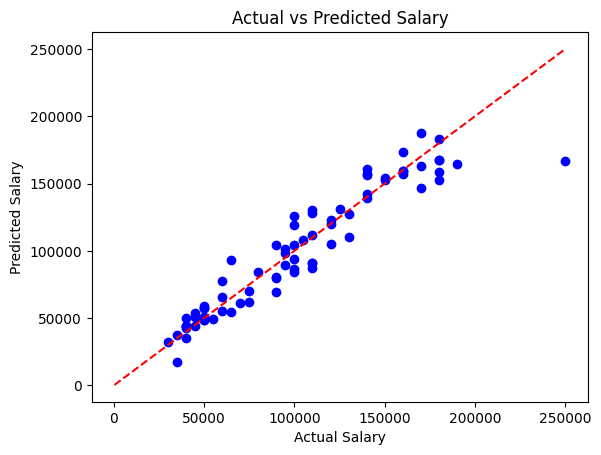

In [10]:
#Evaluate model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [19]:
#Function to take user input and predict salary
def predict_salary_interactive():
    print("\n Let's predict an employee's salary!")
    print()

    try:
        age = int(input("Enter Age: "))
        gender = input("Enter Gender (Male/Female): ").strip().capitalize()
        education = input("Enter Education Level (Bachelor's/Master's/PhD): ").strip()
        job_title = input("Enter Job Title (e.g., Data Analyst, Software Engineer, etc.): ").strip()
        years_exp = int(input("Enter Years of Experience: "))

        # Encode user input
        new_data = pd.DataFrame({
            'Age': [age],
            'Gender': label_encoders['Gender'].transform([gender]),
            'Education Level': label_encoders['Education Level'].transform([education]),
            'Job Title': label_encoders['Job Title'].transform([job_title]),
            'Years of Experience': [years_exp]
        })

        # Predict salary
        predicted_salary = model.predict(new_data)[0]
        print("\n")
        print(f"Predicted Salary: ${predicted_salary:.2f}")
        print()

    except ValueError as e:
        print("\n Invalid input detected")
        print("Possible reasons:")
        print(" - Gender must be 'Male' or 'Female'")
        print(" - Education Level must match dataset")
        print(" - Job Title must exist in dataset")
        print(f"Error details: {e}")


In [18]:
#Run the interactive predictor
predict_salary_interactive()



🔮 Let's predict an employee's salary!

Enter Age: 40
Enter Gender (Male/Female): Female
Enter Education Level (Bachelor's/Master's/PhD): PhD
Enter Job Title (e.g., Data Analyst, Software Engineer, etc.): Sales Manager
Enter Years of Experience: 4


Predicted Salary: $114695.01

